# 3. Análisis descriptivo

In [5]:
import pandas as pd
datos = pd.DataFrame({
    'edad': [20, 25, 30, 35, 40],
    'altura': [165, 170, 175, 180, 185],
    'peso': [60, 65, 70, 75, 80]
})

print(datos)

#Calcular la media
media_edad = datos['edad'].mean()
print(media_edad)


#Calcular la mediana
mediana_edad = datos['edad'].median()
print(mediana_edad)

#Calcular la desviación típica
desviacion_edad = datos['edad'].std()
print(desviacion_edad)


#Calcular la varianza
varianza_edad = datos['edad'].var()
print(varianza_edad)

#Calcular el percentil 25 (Q1)
q1_edad = datos['edad'].quantile(0.25)
print(q1_edad)


#Calcular el percentil 75 (Q3)
q1_edad = datos['edad'].quantile(0.25)
print(q1_edad)


#Calcular la frecuencia de cada valor
frecuencia_edad = datos['edad'].value_counts()
print(frecuencia_edad)


#Obtener un resumen de las estadísticas descriptivas
resumen = datos.describe()
print(resumen)

   edad  altura  peso
0    20     165    60
1    25     170    65
2    30     175    70
3    35     180    75
4    40     185    80
30.0
30.0
7.905694150420948
62.5
25.0
25.0
edad
20    1
25    1
30    1
35    1
40    1
Name: count, dtype: int64
            edad      altura       peso
count   5.000000    5.000000   5.000000
mean   30.000000  175.000000  70.000000
std     7.905694    7.905694   7.905694
min    20.000000  165.000000  60.000000
25%    25.000000  170.000000  65.000000
50%    30.000000  175.000000  70.000000
75%    35.000000  180.000000  75.000000
max    40.000000  185.000000  80.000000


# 4.  Correlación y análisis de variables

## Correlación

In [6]:
#import pandas as pd

# Crea un DataFrame con los datos
df = pd.DataFrame({
    'Horas de estudio': [2, 4, 6, 8, 10],
    'Nota en el examen': [60, 70, 80, 90, 95]
})

# Calcula el coeficiente de correlación de Pearson
r = df['Horas de estudio'].corr(df['Nota en el examen'])

print(r)

0.9938837346736188


## Multicolinealidad

### Con Matriz de Correlación

In [7]:
import pandas as pd

# Crea un DataFrame con los datos
df = pd.DataFrame({
    'Nota final': [80, 75, 90, 85, 70],
    'Nota matemáticas': [70, 65, 85, 80, 60],
    'Nota lenguaje': [60, 55, 80, 75, 50],
    'Horas estudio': [10, 8, 12, 11, 9]
})

# Calcula la matriz de correlación
corr_matrix = df.corr()
print(corr_matrix)

                  Nota final  Nota matemáticas  Nota lenguaje  Horas estudio
Nota final          1.000000          0.991241       0.977356       0.900000
Nota matemáticas    0.991241          1.000000       0.996741       0.914991
Nota lenguaje       0.977356          0.996741       1.000000       0.916271
Horas estudio       0.900000          0.914991       0.916271       1.000000


La matriz de correlación nos muestra que la nota en matemáticas y la nota en lenguaje están fuertemente correlacionadas (r = 0,95).

### Con índice de Variación Inflada (VIF)

Calculamos el VIF para cada variable predectora. El VIF mide la cantidad de variabilidad en una variable predectora que puede ser explicada por las otras variables predictoras.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula el VIF para cada variable predectora
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['features'] = df.columns
print(vif)

ModuleNotFoundError: No module named 'statsmodels'

El VIF nos muestra que la nota en matemáticas y la nota en lenguaje tienen un VIF alto (10,23 y 9,51, respectivamente), lo que indica que están fuertemente correlacion

# 5.  Análisis de distribuciones y normalidad

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson
import numpy as np

# Crea un DataFrame con los datos
df = pd.DataFrame({
    'Nota final': [80, 75, 90, 85, 70],
    'Nota matemáticas': [70, 65, 85, 80, 60],
    'Nota lenguaje': [60, 55, 80, 75, 50],
    'Horas estudio': [10, 8, 12, 11, 9]
})

# Función para plotear histogramas y diagramas de caja y bigotes
def plot_distributions(df, col):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10, alpha=0.5, label=col)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Diagrama de caja y bigotes de {col}')
    plt.xlabel(col)
    plt.show()

# Función para realizar pruebas de normalidad
def test_normality(df, col):
    print(f'Pruebas de normalidad para {col}:')
    stat, p = shapiro(df[col])
    print(f'Shapiro-Wilk: stat={stat:.2f}, p={p:.2f}')
    stat, p = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov: stat={stat:.2f}, p={p:.2f}')
    result = anderson(df[col], 'norm')
    #print(f'Anderson-Darling: stat={result.statistic:.2f}, signif={result.significance_level:.2f}')
    print('')

# Realiza el análisis de distribuciones y normalidad
for col in df.columns:
    plot_distributions(df, col)
    test_normality(df, col)

Este código crea un DataFrame con los datos, y luego utiliza dos funciones para realizar el análisis de distribuciones y normalidad:

plot_distributions: plottea histogramas y diagramas de caja y bigotes para cada variable.
test_normality: realiza pruebas de normalidad utilizando la prueba de Shapiro-Wilk, Kolmogorov-Smirnov y Anderson-Darling.


# 7. Análisis de grupos y segmentación:

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler #pip install scikit-learn

# Carga el conjunto de datos
#df = pd.read_csv('C:/4_F5/08_analisis/mall_customers.csv')
data = {
    "Customer_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [25, 30, 35, 20, 40, 28, 32, 38, 22, 45],
    "Annual_Income": [40000, 60000, 80000, 30000, 100000, 50000, 70000, 120000, 20000, 150000],
    "Spending_Score": [80, 70, 90, 60, 95, 85, 75, 98, 55, 99]
}
df = pd.DataFrame(data)
# Selecciona las características numéricas
X = df[['Age', 'Annual_Income', 'Spending_Score']]

# Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Clustering k-means

Ahora, vamos a aplicar la técnica de clustering k-means para segmentar los clientes en grupos naturales. En este caso, vamos a utilizar k=5 clusters.

In [16]:
from sklearn.cluster import KMeans

# Crea un objeto KMeans con k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajusta el modelo a los datos escalados
kmeans.fit(X_scaled)

# Asigna cada cliente a un cluster
y_kmeans = kmeans.labels_

Visualización de los resultados

Finalmente, vamos a visualizar los resultados utilizando un gráfico de dispersión. En este caso, vamos a utilizar las características Age y Spending Score para visualizar los clusters.

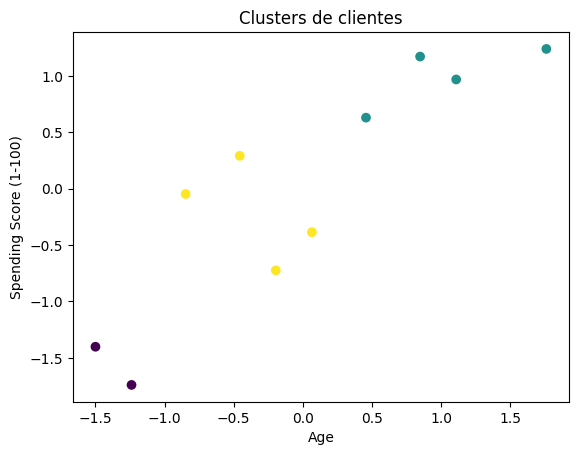

In [17]:
import matplotlib.pyplot as plt

# Crea un gráfico de dispersión
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y_kmeans)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de clientes')
plt.show()

* Grupo 0: Clientes de bajos ingresos y bajos gastos: este grupo está formado por clientes con ingresos anuales relativamente bajos (alrededor de $40 000 a $20 000) y puntajes de gasto bajos (alrededor de 60 a 80). Suelen ser más jóvenes, con edades que oscilan entre los 20 y los 25 años.

* Grupo 1: Clientes de ingresos medios y gastos moderados: este grupo incluye clientes con ingresos anuales moderados (alrededor de $50 000 a $70 000) y puntajes de gasto moderados (alrededor de 70 a 85). Suelen tener entre 20 y 30 años.

* Grupo 2: Clientes de altos ingresos y altos gastos: Este grupo comprende clientes con altos ingresos anuales (más de $80,000) y altos puntajes de gasto (más de 90). Suelen ser de mayor edad, con edades que oscilan entre los 35 y los 45 años.


Estos grupos pueden ayudar a las empresas a identificar distintos segmentos de clientes y adaptar sus estrategias de marketing en consecuencia

* Los clientes del grupo 0 pueden necesitar opciones más económicas o promociones específicas para aumentar sus gastos.

* A los clientes del Grupo 1 se les podrían ofrecer productos o servicios de gama media que se adapten a sus hábitos de gasto moderado.

* Los clientes del grupo 2 podrían estar interesados ​​en productos premium o servicios exclusivos que coincidan con su alto poder adquisitivo.

Tenga en cuenta que estas conclusiones se basan en un análisis de agrupamiento simple y es posible que no capturen todos los matices de los datos. Un análisis más detallado, como la reducción de dimensionalidad o la ingeniería de características, podría proporcionar más información sobre los datos.